In [1]:
# We have to perform sentimental analysis on the given data.

In [2]:
!pip install spacy

In [3]:
!pip install wordcloud

In [3]:
!python -m spacy download en_core_web_md

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [4]:
import numpy as np
import pandas as pd
import string
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [5]:
data=pd.read_csv("Elon_musk.csv",encoding='latin1',error_bad_lines=False)
data

C:\Users\Avanti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [7]:
df=pd.DataFrame(data)
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [8]:
df1=df.rename(columns={'Text':'x'},inplace=True)

In [9]:
df1

In [10]:
df = [x.strip() for x in df.x] # remove both the leading and the trailing characters
df = [x for x in df if x] # removes empty strings, because they are considered in Python as False
df[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [11]:
text=''.join(map(str, df))
text

'@kunalb11 I\x92m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?@joerogan @Spotify Great interview!@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!Happy New Year of the Ox! https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine It\x92s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U+0001F923><U+0001F923>This is 

In [12]:
text1=text.translate(str.maketrans('','',string.punctuation)) #removing the punctuations present in the text
text1

'kunalb11 I\x92m an alienIDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried itjoerogan Spotify Great interviewgtera27 Doge is underestimatedteslacn Congratulations Tesla China for amazing execution last year Now on to the next for even moreHappy New Year of the Ox httpstco9WFKMYu2ojFrodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrMOwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likelyGiveDirectly Just sent someJust agree to do Clubhouse with kanyewesthttpstco3rWE9uHSTSgeoffkeighley UnrealEngine It\x92s getting realBought some Dogecoin for lil X so he can be a toddler hodlerJoshManMode He definitely has issues but the sentencing seems a bit highfreewalletorg Thanks for fixingfreewalletorg Please unlock my accountAstroJordy U0001F923U0001F923This is true power haha httpstcoFc9uhQSd7Ofreewalletorg Any crypto wa

In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
#Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(text1)
print(text_tokens[0:50])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Avanti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['kunalb11', 'I\x92m', 'an', 'alienIDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'itjoerogan', 'Spotify', 'Great', 'interviewgtera27', 'Doge', 'is', 'underestimatedteslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'moreHappy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2ojFrodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he']


In [15]:
len(text_tokens)

19095

In [16]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
#my_stop_words.append('Its')

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['kunalb11', 'I\x92m', 'alienIDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'itjoerogan', 'Spotify', 'Great', 'interviewgtera27', 'Doge', 'underestimatedteslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'moreHappy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2ojFrodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrMOwenSparks', 'flcnhvy', 'anonyx10']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Avanti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Avanti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
len(no_stop_tokens)

13854

In [18]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['kunalb11', 'i\x92m', 'alienidaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'itjoerogan', 'spotify', 'great', 'interviewgtera27', 'doge', 'underestimatedteslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next']


In [19]:
!python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [22]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm') 

In [23]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

kunalb11 Im alienIDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried itjoerogan Spotify Great interviewgtera27 Doge underestimatedteslacn Congratulations Tesla China amazing execution last year Now next even moreHappy New Year Ox httpstco9WFKMYu2ojFrodo underdoge All thought would fail Himself httpstcozGxJFDzzrMOwenSparks flcnhvy anonyx10


In [24]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['kunalb11', 'i\x92m', 'alienidaacarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'itjoerogan', 'spotify', 'great', 'interviewgtera27', 'Doge', 'underestimatedteslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'now', 'next']


In [25]:
len(lemmas)

13878

# Feature extraction

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [27]:
X.shape

(13878, 5544)

In [28]:
pd.DataFrame(vectorizer.vocabulary_,columns=vectorizer.vocabulary_.keys(), index = [0])

,kunalb11,alienidaacarmack,ray,trace,cyberpunk,hdr,nextlevel,have,try,itjoerogan,...,surreal,propaganda,social,httpstcowjrzibkh1hppathole,click,acceptteslagong,samwise,gamgeeppathole,altho,u0001f525u0001f525progress
0,2874,248,3882,4875,1015,1854,3376,1849,4938,2762,...,4587,3808,4329,2488,799,159,4096,1662,266,5029


In [29]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(20)

,0
ðogecoin,5543
zzcool,5542
zonrt,5541
zone,5540
zogfotpik,5539
zip2,5538
zerotrungtphan,5537
zerocerberu21014829,5536
zero,5535
zenit,5534


In [30]:
print(len(vectorizer.vocabulary_))

5544


In [31]:
print(vectorizer.vocabulary_)

{'kunalb11': 2874, 'alienidaacarmack': 248, 'ray': 3882, 'trace': 4875, 'cyberpunk': 1015, 'hdr': 1854, 'nextlevel': 3376, 'have': 1849, 'try': 4938, 'itjoerogan': 2762, 'spotify': 4429, 'great': 1750, 'interviewgtera27': 2729, 'doge': 1177, 'underestimatedteslacn': 5138, 'congratulations': 890, 'tesla': 4680, 'china': 772, 'amazing': 276, 'execution': 1424, 'last': 2895, 'year': 5453, 'now': 3422, 'next': 3375, 'even': 1377, 'morehappy': 3275, 'new': 3373, 'ox': 3552, 'httpstco9wfkmyu2ojfrodo': 2041, 'underdoge': 5137, 'all': 251, 'thought': 4769, 'would': 5416, 'fail': 1462, 'himself': 1900, 'httpstcozgxjfdzzrmowenspark': 2555, 'flcnhvy': 1549, 'anonyx10': 306, 'haha': 1791, 'thank': 4720, 'indeed': 2653, 'tweets': 4962, 'definitely': 1072, 'represent': 3964, 'realworld': 3909, 'time': 4791, 'allocationthe': 255, 'entertaining': 1332, 'outcome': 3526, 'likelygivedirectly': 2964, 'just': 2826, 'send': 4166, 'somejust': 4341, 'agree': 217, 'clubhouse': 808, 'kanyewesthttpstco3rwe9uhsts

In [32]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['218', '21st', '22', '225', '23', '230', '24', '240am', '25', '250', '250kw', '25d', '25gunsteslacomchadhurley', '25k', '25th', '28', '28ai', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3brianheide', '3d', '3rd', '40', '400', '4227', '42u0001f917rt', '430', '43rd', '445pm', '448', '4530000', '45thspacewing', '4680']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\Avanti\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
print(X.toarray().shape)

(13878, 5544)


In [34]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Including bigrams and trigrams

In [35]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(df)

In [36]:
bow_matrix_ngram

<1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 9618 stored elements in Compressed Sparse Row format>

In [37]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first', 'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]


In [38]:
print(bow_matrix_ngram.toarray().shape

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_21516/4256802559.py, line 1)

# TFidf vectorizer

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 10)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(df)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray().shape)
print(tf_idf_matrix_n_gram_max_features.toarray())

['amp', 'co', 'https', 'https co', 'in', 'is', 'of', 'spacex', 'the', 'to']
(1999, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Generating wordcloud

In [40]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

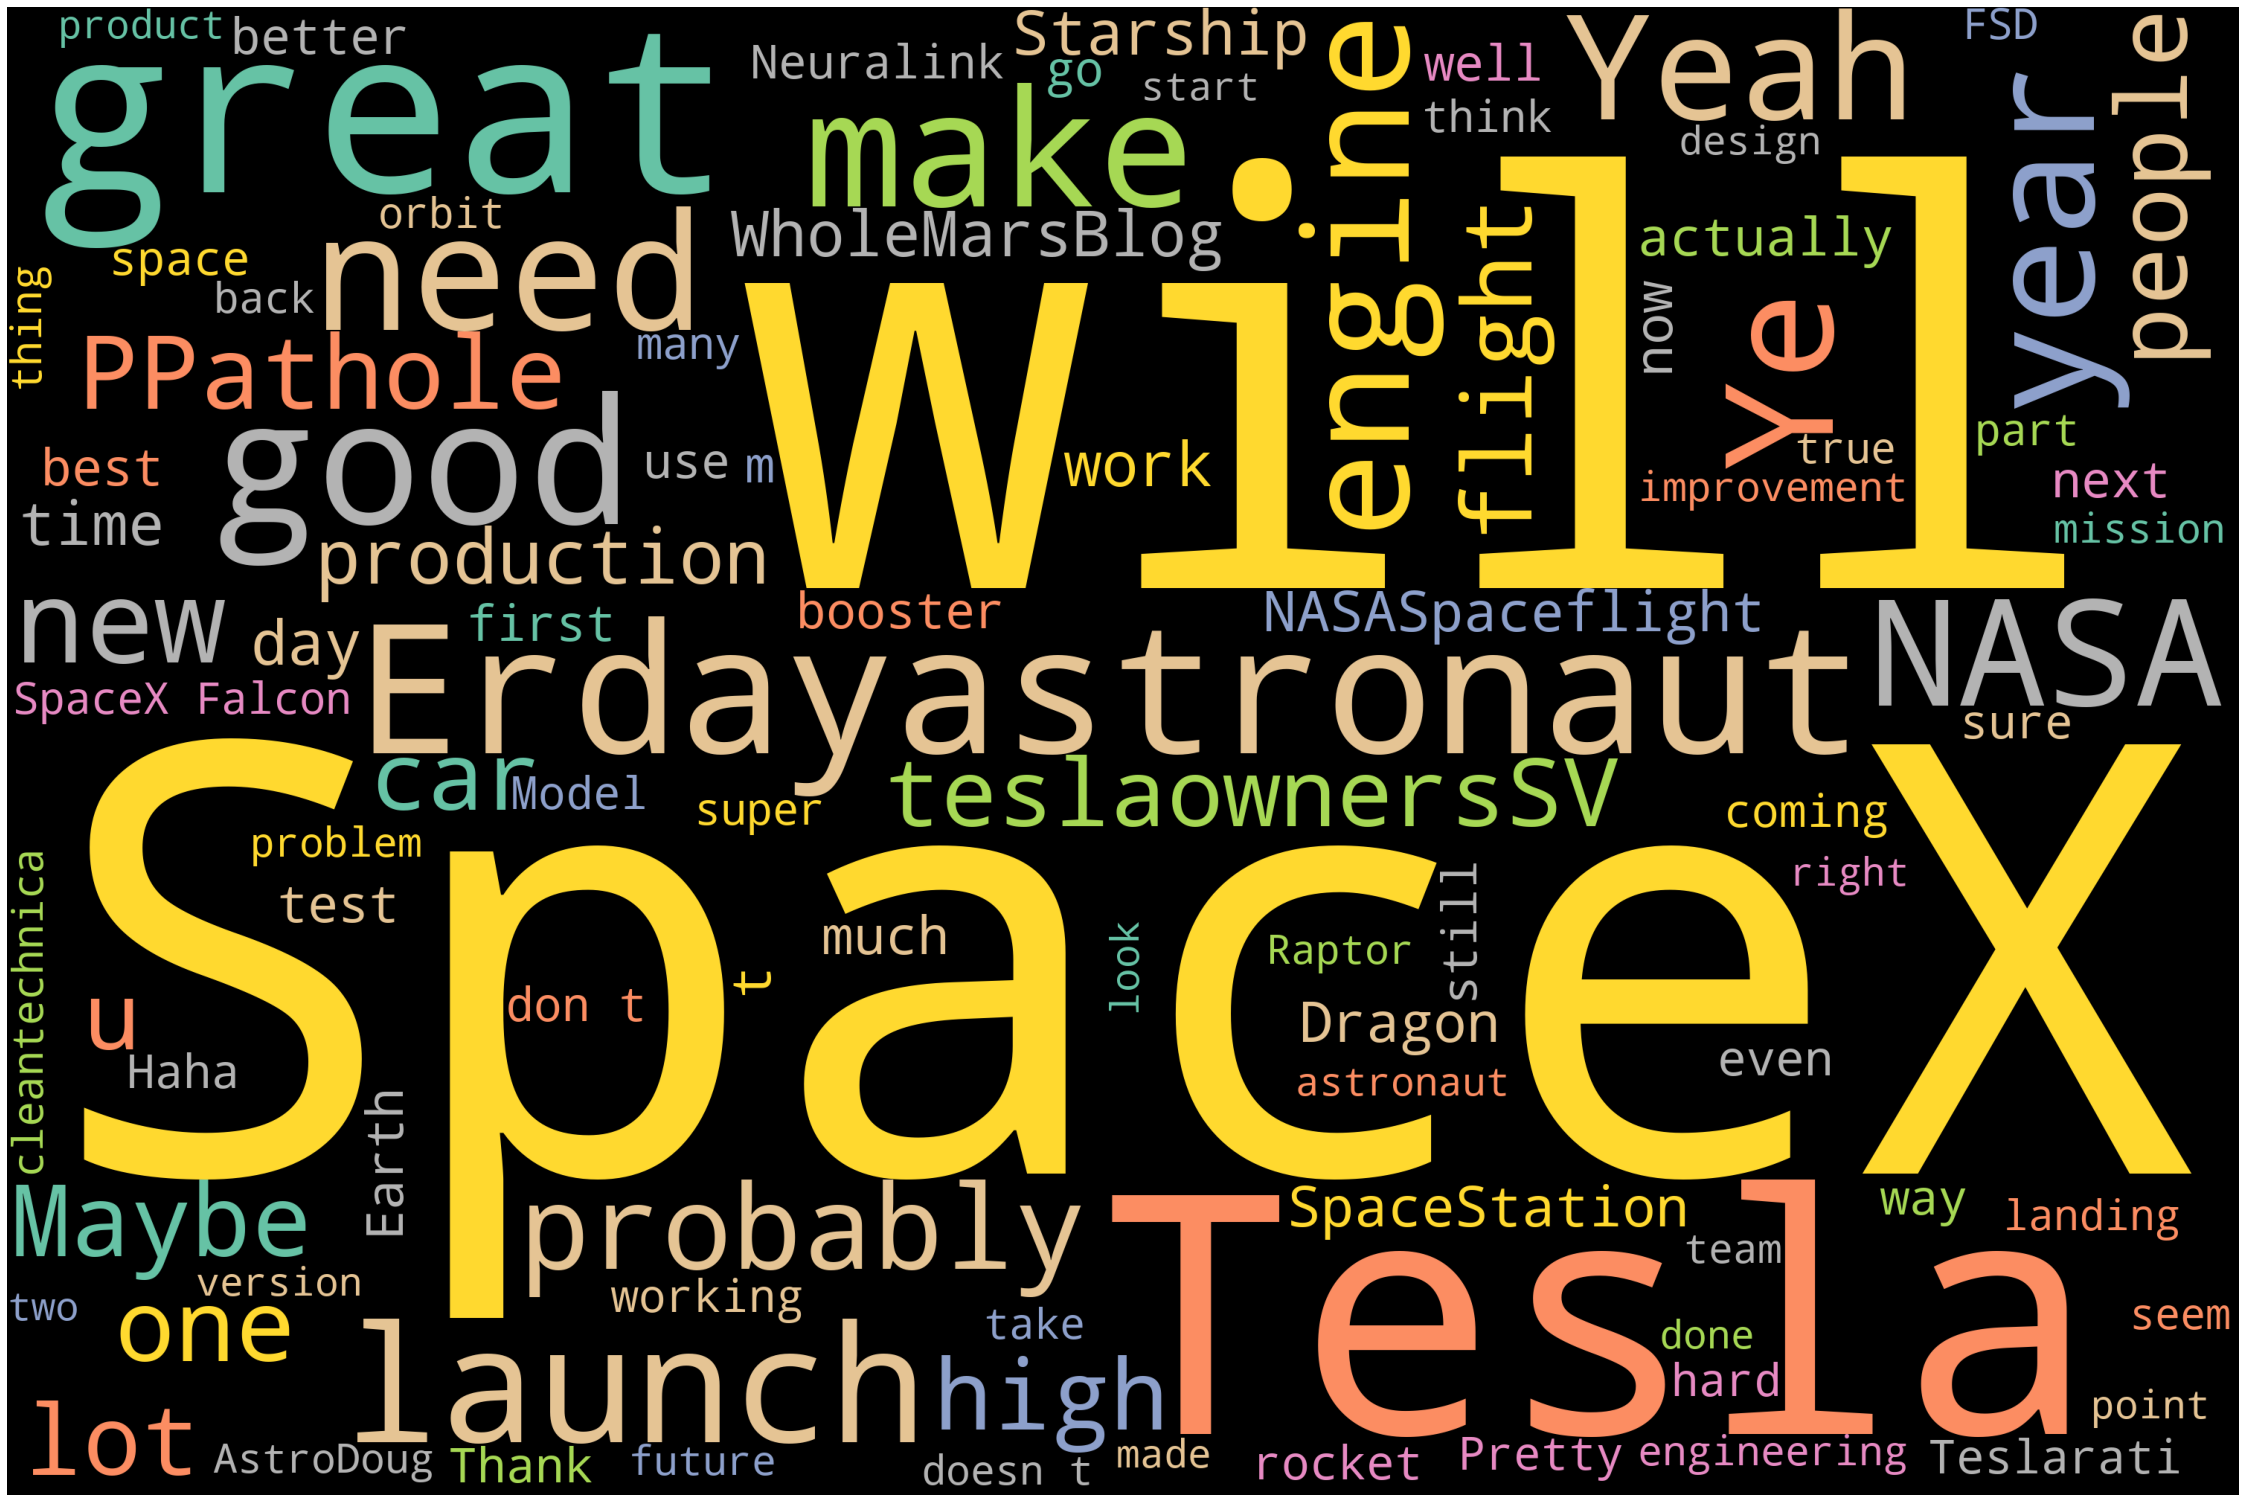

In [41]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('amp')
stopwords.add('flcnhvy')
stopwords.add('S')
stopwords.add('re')


wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text1)
# Plot
plot_cloud(wordcloud)

In [42]:
text1

'kunalb11 I\x92m an alienIDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried itjoerogan Spotify Great interviewgtera27 Doge is underestimatedteslacn Congratulations Tesla China for amazing execution last year Now on to the next for even moreHappy New Year of the Ox httpstco9WFKMYu2ojFrodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrMOwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likelyGiveDirectly Just sent someJust agree to do Clubhouse with kanyewesthttpstco3rWE9uHSTSgeoffkeighley UnrealEngine It\x92s getting realBought some Dogecoin for lil X so he can be a toddler hodlerJoshManMode He definitely has issues but the sentencing seems a bit highfreewalletorg Thanks for fixingfreewalletorg Please unlock my accountAstroJordy U0001F923U0001F923This is true power haha httpstcoFc9uhQSd7Ofreewalletorg Any crypto wa

##Sentiment Analysis 

In [77]:
#Sentiment analysis
afinn = pd.read_csv('C:\\Users\\Avanti\\Desktop\\Avanti datascience\\NLP\\Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [78]:
afinn[1500:]

,word,value
1500,masterpieces,4
1501,matter,1
1502,matters,1
1503,mature,2
1504,meaningful,2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [79]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Avanti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [81]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(df))
sentences[5:15]

['Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O @freewalletorg Any crypto wallet that won\x92t give you your private keys should be avoided at all costs @freewalletorg Your app sucks RT @SpaceX: NASA has selected Falcon Heavy to launch the first two elem

In [82]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [83]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [84]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [85]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [86]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

@kunalb11 Im an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.
Have you tried it?
@joerogan @Spotify Great interview!
@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.
Now on to the next for even more!!
Happy New Year of the Ox!
https://t.co/9WFKMYu2oj Frodo was the underdoge,
All thought he would fail,
Himself most of all.
https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!
Tweets definitely do not represent real-world time allocation.
The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine Its getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923

SpaceX used them.
@ohqwix @BnnJ6bCghvzQxLb <U+0001F923><U+0001F923> @wimgrommen @WSBChairman Indeed.
The economy  making useful products &amp; providing great services  is what actually matters.
@Iupsychdoctor @AOC @RobinhoodApp TANSTAAFL.
Would be better to have small fees than no fees, as latter makes Robin https://t.co/czRhLolYVO Here come the shorty apologists
Give them no respect
Get Shorty u cant sell houses u dont own
u cant sell cars u dont own
but 
u *can* sell stock u dont own!?
this is bs  sh https://t.co/vJkf9BqbOD @RationalEtienne @teslavangelist Yes @28delayslater Finishing engineering this year, production starts next year.
Aiming to have release candidate desig https://t.co/bFverxpOQU @PPathole @Grimezsz I made that video!
@AOC @RobinhoodApp Absolutely @NASASpaceflight Unlike its aircraft division, which is fine, the FAA space division has a fundamentally broken reg https://t.co/sI63AXBJbz @EvanKaylor Nomad @anbuteau <U+0001F917> The esthetics of Cyberpunk a

Ship is held down by massive pins while engines are fir https://t.co/QtIiWLxXPl @Tesmanian_com As promised Legalize comedy @lvladimirovBG You can steal our name/logos &amp; we probably wont sue you @arstechnica @SciGuySpace Were just trying to get people to Mars.
Help would be appreciated.
@SpaceX @Space_Station One day, we will get a camera up there that also shows the star field in the background RT @SpaceX: Separation confirmed!
Dragon performing 3 departure burns to move away from the @Space_Station https://t.co/G27ohWvnXj @lexfridman Suicide is more than double homicide https://t.co/MvWGPs9uQE @lexfridman Absolutely Hey you 
Yeah you Queen 
Youre gonna make it!
<U+0001F495><U+0001F495> https://t.co/LrqdIrbIyd @TheOldManPar @DJSnM @MachinePix Hate to say it, but might be true @MachinePix The robot future is coming @wonderofscience @physicsJ 300km every millisecond, but there are times I wish it were faster https://t.co/TKkruvgBth https://t.co/ocy2gFRYvN @iamdevloper https://t

Multiplayer online version coming soon.
@WSJ Focus on making products &amp; services people truly love, so that the total economic pie is bigger, instead of en https://t.co/qe4jcEzyTq @ThatDesignGuy @m_siphiw @moosuraj @Tesla Roughly 95% of parts in Tesla Roadster were unique  not in any other pro https://t.co/R3yB6CmRB8 @LaurenRow5 @karpathy Yes @engineers_feed Very important @teslaownersSV @lexfridman Ok, service might be able to do this.
Will check.
@teslaownersSV @lexfridman You mean install the external speaker on earlier cars that dont have it?
@GUNMTLM3 @lexfridman No, but definitely this year @lexfridman Good point @conexionspacial @spacecoast_stve @NASASpaceflight Interesting @flcnhvy Liz has always done great interviews @spacecoast_stve @NASASpaceflight Falcon was 25% of successful orbital launches in 2020, but maybe a majority of pa https://t.co/PmGu4vHQEZ @karpathy Vaccines are just the start.
Its also capable in theory of curing almost anything.
Turns medicine into a

Fuel header tank pressure was low during landing burn, causing touchdown velocity to be high &amp; RUD, but we got all https://t.co/wGJVdSahmF Successful ascent, switchover to header tanks &amp; precise flap control to landing point!
https://t.co/IIraiESg5M @TheBabylonBee <U+0001F920> @wonderofscience Near-orbital space is the fastest way to travel long distance on Earth!
@SpaceX @Space_Station Its called the Space Station, but its actually moving around Earth at ~25 times the spee https://t.co/vYVIvrtZsa RT @SpaceX: Time-lapse of Dragon on approach  two Dragons now docked to the @space_station https://t.co/I046jBmC7o So long, and thanks for the orifice!
- Alien message decrypted @SpaceX Probably 1/3 chance of completing all mission objectives @SpaceX Hopefully flying tomorrow @NASASpaceflight Yup RT @NASA: Success!
At 1:40pm ET, @SpaceX's upgraded Dragon cargo spacecraft autonomously docked to the @Space_Station.
<U+0001F409> This is the 1st Out on the pad in South Texas http

@hisdirtremoves @SpaceX I cant comment on turbopump internal details, but youre roughly in the ballpark.
Wow, roc https://t.co/0SRlFg03Fg @TashaARK To be clear, this was just an XPeng problem.
Other companies in China have not done this.
@IsaacLatterell @TashaARK @karpathy Andrej is awesome, but it should be said that we have a very talented Autopilot https://t.co/64ocngk3ey @spacetouristuk @TashaARK Yeah.
They stole Apples code too.
https://t.co/gy4DT7Pq9N @TashaARK They have an old version of our software &amp; dont have our NN inference computer @levie Wild times!
@RocketLab Congrats!
@slashdot .
@TheOnion @ID_AA_Carmack Yup @flcnhvy Change out a few parts, otherwise fine @Forbes Caution strongly advised with SPACs @AdamKIotz @Suvitruf @archillect Sure @Suvitruf @archillect Haha sexy cropping champion of all time @tweetmenima @teslaownerssv If next weeks release looks good, we will widen beta @justpaulinelol @teslaownerssv Unfortunately, there are too many rules around liquor

@austinbarnard45 Just a scratch.
We can buff it out.
@erujabidi Am getting wildly different results from different labs, but most likely I have a moderate case of covid https://t.co/XLBAHahJOj @WhatsupFranks @lexfridman NPCs all the way up @lexfridman Ahem Unless youre on DMT Laws of thermodynamics:
1.
You cant win
2.
You cant break even
3.
You cant stop playing Shakes fist at entropy @RealNattastic Big expansion of beta program in 6 to 8 weeks!
@robintosh_nunez @PPathole Interesting.
My Thursday night saliva sample came back today with N1 gene (unique to cov https://t.co/Tm7cs8oTdT @ICannot_Enough @JohnnaCrider1 Whats honey?
@slashdot Feels that way @WhatsupFranks @bluemoondance74 @StephenKing This seems accurate @bluemoondance74 @StephenKing Cold symptoms are gone for now <U+0001F600><U+0001F680><U+0001F4AB> @StephenKing There are degrees of pos @MrSammy_H @pelagicbird @max_roi @rossy65 Heneghan makes a lot of sense.
Hilarious that he has to clarify that he r https://t.co/MlX

https://t.co/LI4O0TNmL8 @LinusTech @SpaceXStarlink @SpaceX Awaiting approval from Canadian authorities Recruiting ace engineers for Giga Berlin!
Will interview in person tomorrow on site.
Send resume to 25Guns@Tesla.com.
@Chad_Hurley @realDonaldTrump @kanyewest Stop being a chad @Chad_Hurley @realDonaldTrump @kanyewest Uh  Chad wtf @TechAmazing Einstein was great, but did not succeed at engineering (and he tried) @jtrevorchapman Yeah, that will be relatively easy, as so few users out in the ocean @ICannot_Enough @ZainRaz4 @vincent13031925 @JonErlichman Yes, although I didnt expect the stock to rise so much so https://t.co/TMW6phbef0 @FutureJurvetson @PPathole Super appreciate your support, Steve!
That convertible loan gave us 6 months of runway.
https://t.co/eJ7iOVx2W4 @ZainRaz4 @vincent13031925 @JonErlichman Closest we got was about a month.
The Model 3 ramp was extreme stress &amp; pa https://t.co/WuHekj0HIo @vincent13031925 @JonErlichman I put in my last money, even though I tho

@WholeMarsBlog Yup.
With beta updates, therell be a lot of 2 steps fwd, 1 step back situations, but pace of improv https://t.co/H2xcSVnGdO @bart_sanders Working on it.
Also needs to be able fart at other cars on command.
@SpacePadreIsle Starship is coming together!
Price change is pushed to Thursday next week.
Applies only to US for now.
One week clock will start in other countr https://t.co/cjhTxCseLt @austinbarnard45 There will be a 360 deg glass Star Bar (name tbd) at top of high bay @DMC_Ryan Well, we have said many times that the price will rise as the product functionality improves.
How much ti https://t.co/xMeMO5Nu0M @StephenKing Agreed.
Are these performance tires?
@SpaceX Just a small-seeming issue with loss of upper stage camera.
Probably nothing serious, but standing down to https://t.co/ZK1vR9xWZL @flcnhvy Sure Now that Tesla FSD beta is out in limited release, FSD price (new or upgrade) will go up by ~$2k on Monday @TeslaGong @PPathole @teslaownersSV @tesla_raj As soo

The Tesla approach is a general solution.
The lat https://t.co/BbchdqHjjA @akidesir @Kristennetten Yeah, we could put in a setting allowing it to drop as low as 5% @ErcXspace @SpaceX @Erdayastronaut @MarcusHouseGame @FelixSchlang Great render.
Note, there will need to be an arm https://t.co/9g2N7FvSCZ @Kristennetten Mimecraft @TeslaGong @TeslaTested Yes @ICannot_Enough @TeslaTested Autopilot team is making great progress.
Reality sure is complicated!
@ErcXspace @MarcusHouseGame @brendan2908 @BocaChicaGal @NASASpaceflight Aspiring to have no flame diverter in Boca, https://t.co/KyENxZ94oy @eugenelee3 @MarcusHouseGame @brendan2908 @BocaChicaGal @NASASpaceflight We do have giant steel balls haha @TeslaTested We just completed a financing round, but will let you know when there is another one @IheartTesla @alex_avoigt @mike_zimon @WholeMarsBlog I definitely need to try these tasty cakes &amp; pastries on my next visit!
@MarcusHouseGame @brendan2908 @BocaChicaGal @NASASpaceflight Mass ra

We are prioritizing emergency responders &amp; locations with no Internet connectivity at all.
@austinbarnard45 True @teslavibes Thats total market, not all Tesla.
We do see Tesla reaching 20M vehicles/year probably before 2030, bu https://t.co/GXnszaCAR3 @CashMoneyLemon @CathieDWood @skorusARK Total market @CathieDWood @skorusARK Seven years for sure to 30M+ new fully electric vehicles per year, six years maybe.
Five ye https://t.co/FY4nwWbx56 @flcnhvy @CathieDWood Both will do original cars @CathieDWood We arent cutting the price of Model 3 to $25k.
I was referring to a future car that will be smaller than Model 3.
@brian_heide @Tesla What about a heavy duty, paintball machine gun mounted on the bed rails?
@Pickenheim @matthew_kerle New version coming soon @WholeMarsBlog Suppliers.
Were only doing high energy nickel ourselves, at least for now.
Also, maybe the presenta https://t.co/L8Pv6okpkY https://t.co/r1Sox7vta8 @TeslaGong @DrSallyL @sydney_ev @_TeslaTom @TeslaStraya @outba

<U+0001F5A4> Fallout Radio  <U+0001F5A4>
https://t.co/gNo8XFjx8b @TJLK There are some eerie parallels between The Boring Company &amp; Vault-Tec.
We also built our first demonstration tunnel/vault in LA.
Doubles as an underground nuclear shelter <U+0001F600><U+0001F44D> https://t.co/CvI0YRjObE @flcnhvy @lexfridman Yeah @tesladri @ID_AA_Carmack @lexfridman Should be happening soon @ID_AA_Carmack @lexfridman A bit more obscure, but Starhammer &amp; Stainless Steel Rat @engineers_feed At first, I thought that was a parrot @JohnnaCrider1 @jhall They remind me of these guys https://t.co/Qt502U08np Story of my life https://t.co/Vn0Rv0yQ5q Tunnels under cities with self-driving electric cars will feel like warp drive

First operational tunnel under Vega https://t.co/wIZYhEd6Pa @jackfarrington For sure @jackfarrington @Tesla Good point Have you hugged a tunnel today?
@ARKInvest @aurmanARK Good analysis @PPathole Exactly @flcnhvy Gary the snail is still winning, but were gaining on him/her Em

Its https://t.co/IxhyT6NuiC @Teslarati Tesla Germany designed &amp; built the vaccine RNA printers for CureVac, but, subject to some CureVac IP, th https://t.co/X32SdA871G @engineers_feed Technically, James Watt measured a pony, added 50% &amp; rounded up haha https://t.co/vnkO0MTrUC @flcnhvy @GerberKawasaki Also, Critical Thinking @flcnhvy @GerberKawasaki Alexander and the Rise of Hellenism and Film Studies @GerberKawasaki Wow, I super loved astronomy (but took it at Queens, not Penn)!
Definitely one of my favorite class https://t.co/o4FjcGlAhw @teslaownersSV @justpaulinelol Yeah, he sent it to me through a mutual physics prof friend at Caltech/CERN.
Very ba https://t.co/tJsh1Exz1Q @justpaulinelol Its too embarrassing Just learned that my physics prof from Penn is head of Fermilab &amp; still has some of my old homework <U+263A><U+FE0F> @ruskin147 It is unfortunately common for many in academia to overweight the value of ideas &amp; underweight bringing https://t.co/OFFoojCqNv 

The lease payment is specifically lower than loan financing, as Tesla expec https://t.co/VAE3Ppljox @tobyliiiiiiiiii @Erdayastronaut @nextspaceflight We will push for ten flights with Starlink @flcnhvy @Erdayastronaut @nextspaceflight Almost never need to replace whole engine, but some individual parts like https://t.co/fdnxdWh4eT @Erdayastronaut @cnunezimages @SpaceIntellige3 Mostly for employees, but well support public access whenever its https://t.co/Y5DB5mkZPu @EvaFoxU @cnunezimages @SpaceIntellige3 Absolutely <U+0001F603> <U+0001F3DD> @Erdayastronaut @nextspaceflight I dont want be cavalier, but there isnt an obvious limit.
100+ flights are possi https://t.co/3dHapZhixH @cnunezimages @SpaceIntellige3 Ive been working in Boca since Sunday.
August heat &amp; humidity in South Texas is int https://t.co/xEPds9ItUW @ajtourville @comma_ai @Tesmanian_com Dojo V1.0 isnt done yet.
About a year away.
Not just about the chips.
Power https://t.co/tSbttIdUHJ @spacecoast_stve Scorc

Will make rear body in a https://t.co/mwZJYLhd88 @renarddemoscou @BillGates Sorry to hear this.
What can we do to help?
@Teslarati No surprise @Teslarati Aiming to make it super fun!
@Teslarati A little toastier each flight @flcnhvy Same hex tiles, slightly different mounting method.
Need bigger sections of tiles to see how they hold up https://t.co/XNIPTypahf SN7 will be new alloy test tank taken to burst pressure.
SN8 will have body flaps &amp; nosecone.
SN 5 &amp; 6 at Starship Production Complex in Texas https://t.co/8BVRD5VdU7 @Mark_Goldberg_ @Tesla One day soon, I will wear this outfit https://t.co/T0SnF4UgYK @Mark_Goldberg_ @Tesla I was trying to channel Herb Tarlek from WKRP https://t.co/0RC72S0ZAY @Mark_Goldberg_ @Tesla Note the fabulous plaid jacket &amp; gingham shirt combo <U+0001F923> @archillect Twin Peaks @SamTalksTesla Working on my Moms cousins farm in Saskatchewan at age 17.
I think we did a barn-raising that day.
@wonderofscience https://t.co/y7LrlouXr9 @Erdayast

The matrix in the matrix.
@Neuro_Skeptic They dont fire all at once.
Some go several seconds to minutes without firing.
Some fire several ti https://t.co/kY8H0oyZYX @NASAPersevere @ulalaunch @NASA_LSP Congrats on a great launch!
But sometimes when we touch 
https://t.co/KMassjCtIx @jelle56367384 @Anvithvittal @DNPthree @tiesto Adagio for Strings is great
https://t.co/RgY1P1VGoU Losing It
https://t.co/9HOY0ldzg4 @EuroSandor @RSprachrohr <U+0001F923><U+0001F923> @RenataKonkoly @Sneakyness Mein Herz Brennt.
Best boss battle song ever.
https://t.co/JIl6vzhQAx @flcnhvy Robot Heart is <U+0001F525><U+0001F525> @Sneakyness One of the all time best @tobyliiiiiiiiii Sure Sure could use a good rave
Whats your favorite techno I  I just died in your arms tonight The rumor that Bill Gates &amp; I are lovers is completely untrue @WholeMarsBlog @PPathole Yeah.
Display will also soon render Teslas specifically as their model &amp; color instead of https://t.co/5lpnPLTP24 @keith31345919 @PPathole 

@PPathole @Teslarati @BocaChicaGal Will attempt to fly later this week @sri_myneni @Erdayastronaut @considercosmos @SpaceX Sound &amp; flame color will be quite different @glenn22x @Teslarati @BocaChicaGal Yes @Teslarati @BocaChicaGal Were rapidly changing alloy constituents &amp; forming methods, so traditional names like 304 https://t.co/FYUuio5Dtz @flcnhvy <U+0001F923><U+0001F923> @cleantechnica At some point, we should probably do advertising as art/communication/entertainment &amp; to support high quality media RT @SpaceX: Watch Falcon 9 launch ANASIS-II <U+2192> https://t.co/bJFjLCzWdK  https://t.co/iYHJZnZobv Das baby kann noch keinen löffel benutzen https://t.co/UETqVIA4BP @JohnnaCrider0 @YStijd @ID_AA_Carmack Its almost right @YStijd @ID_AA_Carmack We talked about an hour ago.
He seems fine.
@ID_AA_Carmack VR Twitter with avatars saying the mentions <U+0001F608> @cleantechnica Better to put the money into the product than sales &amp; marketing!
@PPathole We should bring Lif

This is both great &amp; terrifying.
Everything weve ever sensed or thought has been https://t.co/B3ZXD384qD @redmercy Yes @buzzindelhi Sorry, should hopefully be soon!
@kenyanwalstreet Not actually a payout, just a vesting of stock options.
It may never pay out, as the stock cant b https://t.co/8Zg37STXT9 @IheartTesla No easy way to answer this in a tweet, but helping with dire brain injuries is our first priority.
Details Aug 28.
AI symbiosis while u wait @vistacruiser7 @flcnhvy Theres some of that too @flcnhvy True, it sounds so surreal, but the negative propaganda is still all out there &amp; easy to find in social me https://t.co/WJRzIbKh1H @PPathole Make sure to read ur terms &amp; conditions before clicking accept!
@TeslaGong @PPathole Samwise Gamgee @PPathole Altho Dumb and Dumber is <U+0001F525><U+0001F525> Progress update August 28


In [87]:
sent_df

,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0
...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0
920,"It may never pay out, as the stock cant b ht...",-4
921,Details Aug 28.,0
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [88]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     13
1      4
2      4
3     13
4      8
5      6
6     14
7     10
8      8
9    109
Name: word_count, dtype: int64

In [89]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
159,@harsimranbansal @heydave7 It will most likely...,11,93
151,"@GUNMTLM3 @lexfridman No, but definitely this ...",11,45
817,Might be able to https://t.co/FB7e5nOq2E @Pri...,11,72
184,"Also, w https://t.co/IYdKttVsqk @cleantechnic...",12,98
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
645,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231
719,We just havent observed the https://t.co/mez...,15,72
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94


In [90]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.00000
mean       1.37013
std        2.67799
min       -8.00000
25%        0.00000
50%        0.00000
75%        3.00000
max       16.00000
Name: sentiment_value, dtype: float64

In [91]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14


C:\Users\Avanti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

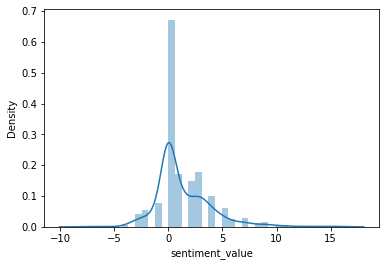

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])